In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')

path = '/Users/dangloan/Documents/learning_analytics/project/'

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', -1)

In [81]:
df = pd.read_csv(path + '3_data/clothing_review/Womens Clothing E-Commerce Reviews.csv')

In [82]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [83]:
df.columns =['Clothing_ID',
 'Age',
 'Title',
 'Review_Text',
 'Rating',
 'Recommended_IND',
 'Positive_Feedback_Count',
 'Division_Name',
 'Department_Name',
 'Class_Name']

In [ ]:
df.head(2)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
a = df.groupby('Clothing_ID')['Age'].count().reset_index()
b = a.sort_values(by='Age',ascending=False)
# b['Age'] = b['Age'].astype(int)
b['Clothing_ID'] = b['Clothing_ID'].astype(str)
print(b['Age'].dtype)
print(b['Clothing_ID'].dtype)

fig, ax1 = plt.subplots(figsize=(12,6))
sns.distplot(b['Age'])
plt.xlabel('Count_ProductID')

In [ ]:
a.describe()

In [ ]:
print(b['Age'].dtype)
print(b['Clothing_ID'].dtype)

##### A product (Clothing_ID) can receive more than one review. So, analysis per product can be an idea.

In [ ]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(df)

In [ ]:
profile

In [84]:
#Clean data
#First remove duplicates
df[df.duplicated(keep=False)].sort_values(by='Clothing_ID')
df.drop_duplicates(keep='first',inplace=True)
# df[df['Clothing_ID'] == 862]

In [85]:
a = df.groupby('Class_Name').agg({'Rating': ['mean','std','count'],
                                 'Positive_Feedback_Count':'sum'}).reset_index()
a.columns = ['Class_Name','Rating_mean','Rating_std','Rating_count','PFC']
a = a[~a['Class_Name'].isin(['Chemises','Casual bottoms','Trend'])]


dept_map = df[['Class_Name','Department_Name']]
dept_map.drop_duplicates(keep='first', inplace=True)
dept_map.dropna(inplace=True)

a = pd.merge(a, dept_map, how='left', on='Class_Name')
a.sort_values('Rating_mean',ascending=False)

,Class_Name,Rating_mean,Rating_std,Rating_count,PFC,Department_Name
7,Layering,4.376712,0.969468,146,192,Intimate
5,Jeans,4.360384,1.016957,1146,2018,Bottoms
9,Lounge,4.301013,1.026736,691,1604,Intimate
4,Jackets,4.295455,1.143070,704,1990,Jackets
14,Sleep,4.285088,1.131194,228,399,Intimate
3,Intimates,4.279221,1.128923,154,120,Intimate
8,Legwear,4.278788,1.161306,165,210,Intimate
11,Pants,4.265850,1.067614,1388,3327,Bottoms
2,Fine gauge,4.260237,1.071052,1099,2215,Tops
12,Shorts,4.255521,1.055880,317,531,Bottoms


In [86]:
a = df.groupby('Class_Name').agg({'Rating': ['mean','std','count'],
                                 'Recommended_IND':['mean']}).reset_index()
a.columns = ['Class_Name','Rating_mean','Rating_std','Rating_count','Rec']
a = a[~a['Class_Name'].isin(['Chemises','Casual bottoms','Trend'])]


dept_map = df[['Class_Name','Department_Name']]
dept_map.drop_duplicates(keep='first', inplace=True)
dept_map.dropna(inplace=True)

a = pd.merge(a, dept_map, how='left', on='Class_Name')
a.sort_values('Rating_mean',ascending=False)

'rating_stats_by_class_dept.html'

In [92]:
import plotly.express as px
# df = px.data.gapminder()

fig = px.scatter(a, x="Rec", y="Rating_mean",
                 size="Rating_count", color="Department_Name",
                 hover_name="Class_Name",log_x=True, size_max=80)

fig.update_layout(
    title='Rating Statistics by Class and Department',
    xaxis=dict(
        title='Reccomendation Indicator',
        gridcolor='white',
        type='log',
        gridwidth=2,
    ),
    yaxis=dict(
        title='Average Rating',
        gridcolor='white',
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)

import plotly as py
py.offline.init_notebook_mode(connected=True)
py.offline.plot(fig, filename='rating_stats_by_class_dept.html')

'rating_stats_by_class_dept.html'

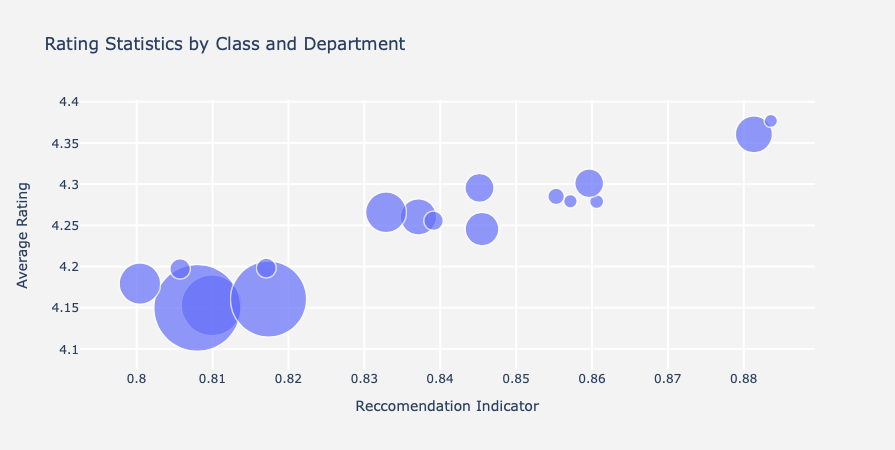

In [95]:
import plotly.graph_objects as go
fig = go.Figure()
size = [20, 40, 60, 80, 100, 80, 60, 40, 20, 40]
fig = go.Figure(data=[go.Scatter(
    x=a['Rec'],
    y=a['Rating_mean'],
    text=a['Class_Name'],
    mode='markers',
    marker=dict(
        size=a['Rating_count'],
        sizemode='area',
        sizeref=2.*max(size)/(60.*2),
        sizemin=4,line_width=1.5
    )
)])

fig.update_layout(
    title='Rating Statistics by Class and Department',
    xaxis=dict(
        title='Reccomendation Indicator',
        gridcolor='white',
        gridwidth=2,
    ),
    yaxis=dict(
        title='Average Rating',
        gridcolor='white',
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)
fig.show()

### Data Preprocessing

In [6]:
df['Review_Text'] = df['Review_Text'].astype(str)

In [7]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dangloan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/dangloan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))

In [9]:
# Clean Review_Text

def clean(text):
    #Remove punctuations
    t = re.sub('[^a-zA-Z]',' ',text)
    #Convert to lowercase
    t = t.lower()
    #Remove tags
    t=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",t)
    #Remove special characters and digits
    t=re.sub("(\\d|\\W)+"," ",t)
    #Convert to list from string
    t = t.split()
    #Remove stopwords
    t = [word for word in t if not word in stop_words]
    t = " ".join(t)
    return t

df['Review_Text_cleaned'] = df['Review_Text'].apply(lambda x: clean(x))
df['Review_Text_cleaned'].dropna(inplace=True)

In [10]:
#Tokenize
from nltk.tokenize import sent_tokenize
df['Review_Text_sentences'] = df['Review_Text_cleaned'].apply(sent_tokenize)

from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

def token_text(text):
    return [w_tokenizer.tokenize(w) for w in text]
df['Review_Text_tokenized'] = df['Review_Text_sentences'].apply(token_text)

[nltk_data] Downloading package punkt to /Users/dangloan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
#POS tagging
from nltk import pos_tag

# def pos_tag(text):
#     return [pos_tag(w) for w in text]
# df2['Review_Text_postag'] = df2['Review_Text_sentences'].apply(pos_tag) ## This function results in an 
#                                                                            ## error "Maximum recursion"

df['Review_Text_postag'] = df['Review_Text_tokenized'].apply(lambda sentence:
                        [pos_tag(token) for token in sentence])

In [12]:
# Convert Penn treebank tag to wordnet tag
from nltk.corpus import wordnet
def penn_to_wn_tags(pos_tag):
    if pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('J'):
        return wordnet.ADJ
#     elif pos_tag.startswith('R'):
#         return wordnet.ADV
    else:
        return None

# lemmatize text based on POS tags
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

def lemmatize_text(text):
#     pos_tagged_text = pos_tag_text(text)
    lemmatized_tokens = [[wnl.lemmatize(el[0], penn_to_wn_tags(el[1]))
                         if penn_to_wn_tags(el[1]) else el[1]
                         for el in pos_tagged_text]
                         for pos_tagged_text in text]
    
    return lemmatized_tokens

In [13]:
df['Review_Text_lemmatized'] = df['Review_Text_postag'].apply(lemmatize_text)

In [14]:
from itertools import chain 
df['tokens'] = df['Review_Text_lemmatized'].map(lambda sentences: list(chain.from_iterable(sentences)))
df['tokens'] = df['tokens'].map(lambda tokens: [token.lower() for token in tokens if token.isalpha() 
                                                    and token.lower() not in stop_words and len(token)>2])

In [ ]:
# processed_data=df['tokens'].values.tolist()
# flat_data = [item for sublist in processed_data for item in sublist]

### Visualize data with wordcloud

Now, I would be curious to see what customers like and don't like in the high rating (Layering, Jeans, etc.) and lower-than-average rating (Sweaters, Knits, Dressees, Blouses)

In [15]:
# Explore review review title with wordcloud
# Start with loading all necessary libraries
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
# %% [code]
neg_rating = df[(df['Rating'] <= 2)]
pos_rating = df[(df['Rating'] == 5)]

There are 288705 words in the combination of selected review.


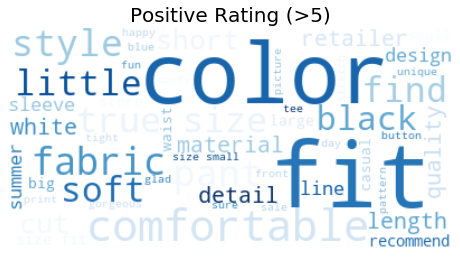

--------------------------------------------------
There are 54408 words in the combination of selected review.


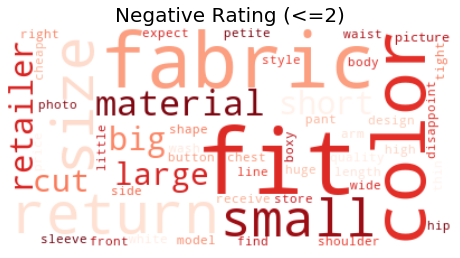

In [40]:
# %% [code]
#Creating a list of custom stopwords
my_words = ['nan','way','back','x','bit','JJS','DT','CD','VBZ','MD', 'RB','rp','wrb','wdt',
            'disappointed','usually','still','bottom','however','item',
            'reason','much','great','definitely','lb','DT','work',
            'x','feel','pair','super','fall','piece','cd',
            'seem','md','coat','beautiful','thought','felt',
            'sad','ordered','someone','perfect',
            'make','wear','love','get','go','order','try','want',
            'run','think','see','review','buy','good',
            'take','come','give','keep','put','need','say','online',
            'bad','nice','cool','dt','rbr','person','purchase',
            'jacket','pants','shirt','dress','sweater','top','skirt','jean','blouse','denim',
           'look','like','really','would',
           'cute','flatter','unflattering']
stop_words = stop_words.union(my_words)

def wordcloud(data,title,color):
    processed_data=data['tokens'].values.tolist()
    flat_data = [item for sublist in processed_data for item in sublist]
    

    text1 = " ".join(sentence for sentence in flat_data)
    print ("There are {} words in the combination of selected review.".format(len(flat_data)))


    wordcloud = WordCloud(stopwords=stop_words,max_font_size=80, max_words=50,
                          background_color="white",
                         colormap=color).generate(text1) ##'Dark2'

    # Display the generated image:
    # the matplotlib way:
    plt.figure(figsize=[8,8])
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title,fontsize = 20)
#     plt.savefig(path + '/3_data/clothing_review/WdClould_negative_lessthan2.png')
    plt.show()
    
wordcloud(pos_rating,'Positive Rating (>5)','Blues')
print("-"*50)
wordcloud(neg_rating,'Negative Rating (<=2)','Reds')

In [ ]:
plt.savefig(path + '/3_data/clothing_review/WdClould_negative_lessthan2.png')

In [ ]:
# %% [code]
text = " ".join(review for review in df2['Review_Text'].astype(str))
print ("There are {} words in the combination of all review.".format(len(text)))
stopwords = set(STOPWORDS)
stopwords.update(['nan','cute','wanted','disappointed','disappointing',
                  'disappointment','beautiful','love','dress','terrible',
                  'good','top','bad','sadly','nice','great','pretty','horrible',
                  'super','poor','sad','way','jeans','run','runs','pant',
                 'really','back','even','much','ordered','wear','one','tried'])

wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white",max_words=30,
                     colormap="tab20").generate(text) ##'Dark2'

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=[8,8])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Top words for high rating (5 Stars)')
# plt.savefig(path + '/3_data/clothing_review/WdClould_positive_equal5.png')
plt.show()

In [ ]:
# %% [code]
df3 = df[(df['Rating'] <= 3) & (df['Class_Name'] == 'Intimates')]
text = " ".join(review for review in df3['Title'].astype(str))
print ("There are {} words in the combination of all review.".format(len(text)))
stopwords = set(STOPWORDS)
stopwords.update(['nan','cute','wanted','disappointed','disappointing',
                  'disappointment','beautiful','love','dress','terrible',
                  'good','top','bad','nice','great','pretty','horrible',
                  'super','poor','sad','way','really','sweater','much',
                 'upon','attractive','ideal','pant','pants'])

wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white",
                     colormap="tab20").generate(text) ##'Dark2'

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Top words for low rating (1 and 2 Stars)')
plt.show()

In [ ]:
df['Class_Name'].unique()

In [ ]:
class_name = ['Intimates', 'Dresses', 'Pants', 'Blouses', 'Knits', 'Outerwear',
       'Lounge', 'Sweaters', 'Skirts', 'Fine gauge', 'Sleep', 'Jackets',
       'Swim', 'Trend', 'Jeans', 'Legwear', 'Shorts', 'Layering',
       'Casual bottoms', 'Chemises']

In [ ]:
class_name[0]

In [ ]:
fig, axes = plt.subplots(10, 2, figsize=(20,20), sharex=True, sharey=True)
for i, ax in enumerate(axes.flatten()):
    print(i)
    print(ax)

In [ ]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

class_name = ['Intimates', 'Dresses', 'Pants', 'Blouses', 'Knits', 'Outerwear',
       'Lounge', 'Sweaters', 'Skirts', 'Fine gauge', 'Sleep', 'Jackets',
       'Swim', 'Trend', 'Jeans', 'Legwear', 'Shorts', 'Layering',
       'Casual bottoms', 'Chemises']


fig, axes = plt.subplots(10, 2, figsize=(30,30), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    data = df[(df['Rating'] <= 3) & (df['Class_Name'] == class_name[i])]
    text = " ".join(review for review in data['Title'].astype(str))
    cloud.generate(text)
    plt.gca().imshow(cloud)
    plt.gca().set_title(class_name[i], fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

### Count number of words in a sentence
to see if applying LDA is ok (LDA doesn't perform well if sentence is less than 20 words

In [ ]:
df2['count_word'] = df2['Review_Text_cleaned'].apply(lambda x: len(x.split()))

In [ ]:
df2['count_word'].describe()

The average number of words in a clean text (in a row) is 22 (>20), which is fine for applying LDA. One possible way to increase number of word in a text is to merge reviews of the same product into one cell (negative to negative, positive to positve, not mixing negative with positive reviews).

### Top frequent word

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8,stop_words=stop_words,
                   max_features=10000, ngram_range=(1,3))

corpus = df['Review_Text_cleaned'].tolist()
X=cv.fit_transform(corpus)

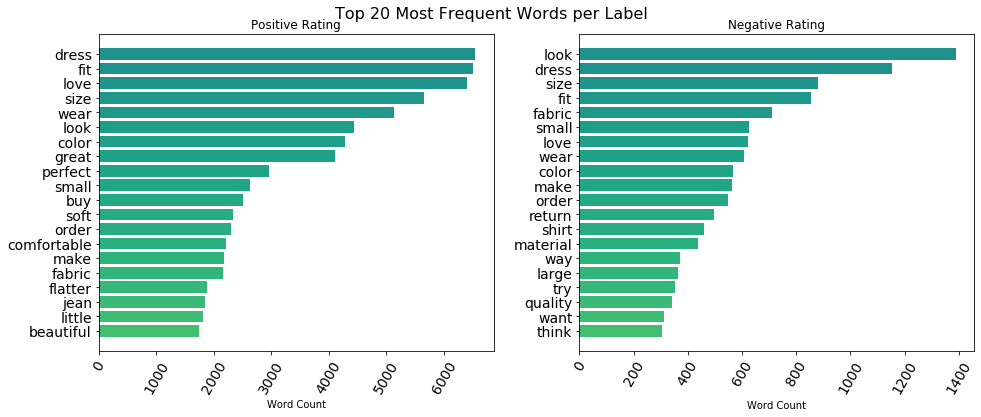

In [79]:
# Import libraries
import pandas as pd
import numpy as np
from plotly import __version__
%matplotlib inline
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

init_notebook_mode(connected=True)
cf.go_offline()


def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]




processed_data1=pos_rating['tokens'].values.tolist()
flat_data1 = [item for sublist in processed_data1 for item in sublist]

processed_data2=neg_rating['tokens'].values.tolist()
flat_data2 = [item for sublist in processed_data2 for item in sublist]

common_words1 = get_top_n_words(flat_data1, 20)
# for word, freq in common_words1:
#     print(word, freq)
a = pd.DataFrame(common_words1, columns = ['ReviewText' , 'count'])
b = a.groupby('ReviewText').sum()['count'].reset_index().sort_values(by='count',ascending=False)


common_words2 = get_top_n_words(flat_data2, 20)
# for word, freq in common_words2:
#     print(word, freq)
aa = pd.DataFrame(common_words2, columns = ['ReviewText' , 'count'])
bb = aa.groupby('ReviewText').sum()['count'].reset_index().sort_values(by='count',ascending=False)




# set the color of the bar graphs
from matplotlib import cm

color = cm.viridis(np.linspace(.5,.8, 30))


new_figure = plt.figure(figsize=(14,6))

ax = new_figure.add_subplot(121)
ax.invert_yaxis()

ax2 = new_figure.add_subplot(122)
ax2.invert_yaxis()

# generating a bar chart on each axes
# b.iplot(kind='bar', yTitle='Count', linecolor='black', ax=ax,
#           title='Positive Rating')

# bb.iplot(kind='bar', yTitle='Count', linecolor='black', ax=ax2,
#           title='Negative Rating')

ax.barh(b['ReviewText'], b['count'],color=color)
ax2.barh(bb['ReviewText'], bb['count'],color=color)

ax.title.set_text('Positive Rating')
ax2.title.set_text('Negative Rating')

for ax in new_figure.axes:
    plt.sca(ax)
    plt.xticks(rotation=60, fontsize=14)
    plt.xlabel("Word Count")
    plt.yticks(fontsize=14)
plt.tight_layout(pad=2)

new_figure.suptitle('Top 20 Most Frequent Words per Label', fontsize=16)

# plt.savefig('../visualizations/label_word_count_y.png', bbox_inches = "tight", pad_inches=.5)
plt.show()

In [ ]:
!pip install cufflinks

In [ ]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in
    vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1],
    reverse=True)
    return words_freq[:n]

#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

In [ ]:

#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2), max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1],reverse=True)
    return words_freq[:n]

top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)

#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

In [ ]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1],
    reverse=True)
    return words_freq[:n]


top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)

#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

In [ ]:
##Get some information of the clothing item from df dataset
cat = df_neg[df_neg['Class_Name'] == 'Jeans']
df_cat = df2[df2['Clothing_ID'].isin(cat['Clothing_ID'])]